## Importing libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator

## Spliting the Data and Importing the data

In [2]:
x_train = pd.read_csv("csvTrainImages 13440x1024.csv", header=None)
y_train = pd.read_csv("csvTrainLabel 13440x1.csv", header=None)

x_test = pd.read_csv("csvTestImages 3360x1024.csv", header=None)
y_test = pd.read_csv("csvTestLabel 3360x1.csv", header=None)

In [3]:
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(13440, 1024) (13440, 1) (3360, 1024) (3360, 1)


In [5]:
x_test.head()

,0,1,2,3,4,5,6,7,8,9,...,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
# Converting dataframe to list format

x_train  = x_train.iloc[:,:].values
x_test   = x_test.iloc[:,:].values

y_train  = y_train.iloc[:,:].values
y_test   = y_test.iloc[:,:].values

In [8]:
print("Distinct Labels: ", np.unique(y_train))

Distinct Labels:  [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28]


In [9]:
# Reshape the image shape into 32 x 32
x_train = x_train.reshape(x_train.shape[0],32,32)
x_test  = x_test.reshape( x_test.shape[0],32,32)

In [10]:
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(13440, 32, 32) (13440, 1) (3360, 32, 32) (3360, 1)


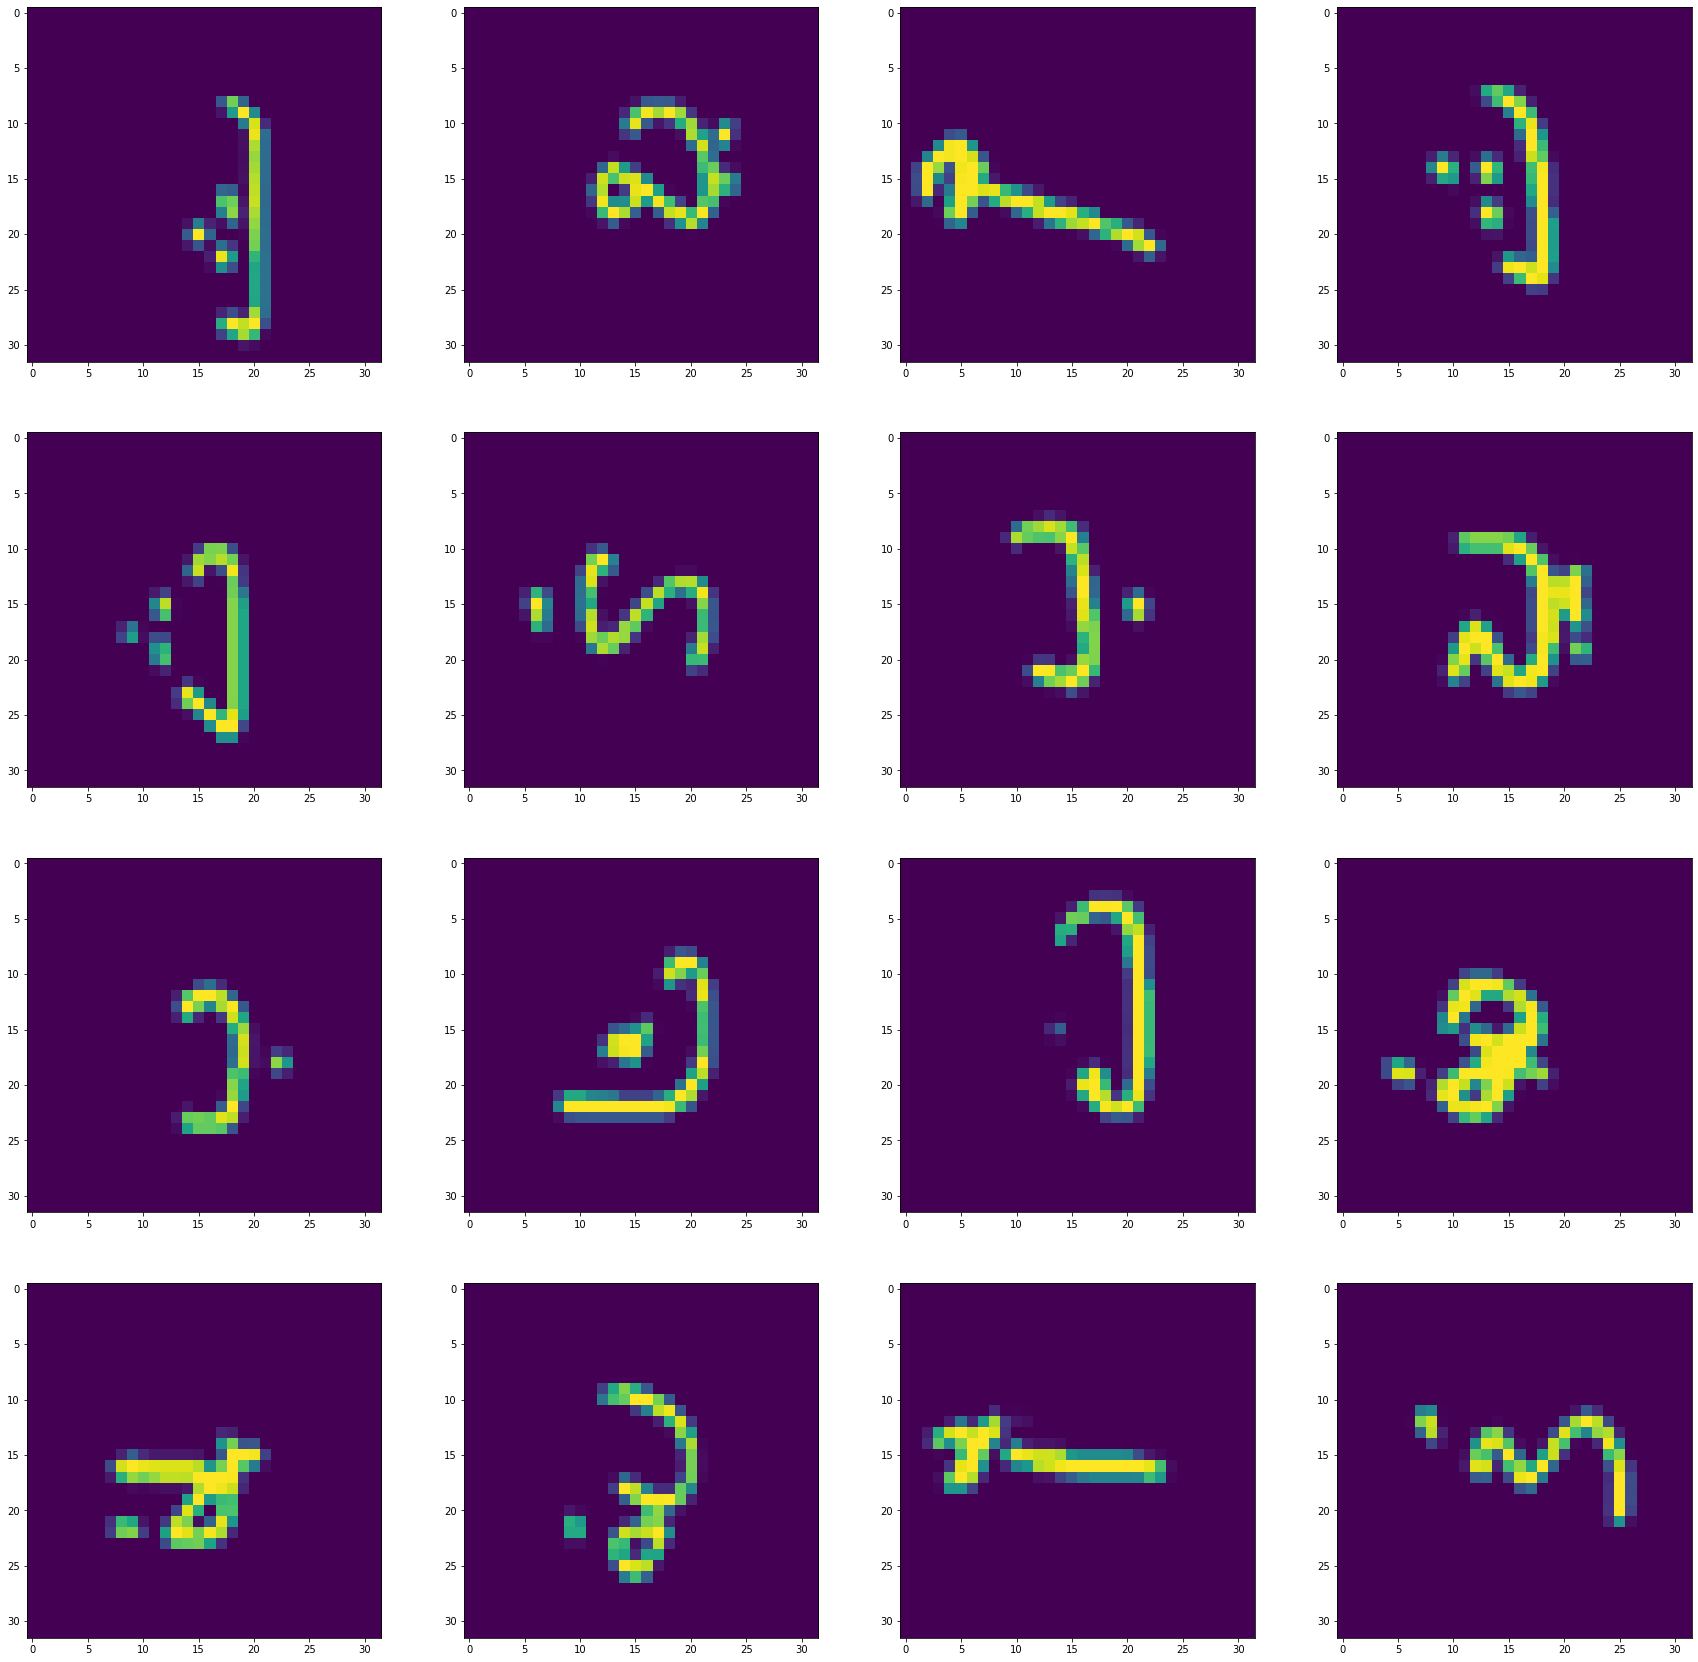

In [11]:
fig, ax = plt.subplots(4,4, figsize = (30,30))

for i in range(4):
    for j in range(4):
        ax[i,j].imshow(x_train[np.random.randint(0,x_train.shape[0])])

In [12]:
# Normalizing the data and One hot encoding of labels
x_train = x_train/255.0
x_test = x_test/255.0

In [13]:
total_classes = len(np.unique(y_train)) + 1
print(total_classes)

29


In [14]:
y_train = to_categorical(y_train, total_classes)
y_test = to_categorical(y_test, total_classes)

In [15]:
print(y_train.shape, y_test.shape)

(13440, 29) (3360, 29)


## Expanding the dimensions

In [16]:
print(x_train.shape, x_test.shape)

(13440, 32, 32) (3360, 32, 32)


In [17]:
x_train = x_train.reshape([-1, 32, 32, 1])
x_test = x_test.reshape([-1, 32, 32, 1])

In [18]:
print(x_train.shape, x_test.shape)

(13440, 32, 32, 1) (3360, 32, 32, 1)


# Building the Model

In [19]:
model = Sequential([
    Conv2D(32, 3, padding='same', activation='relu', input_shape=(32,32,1)),
    MaxPooling2D(2,2),
    
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(2,2),
    
    Conv2D(128, 3, padding='same', activation='relu'),
    MaxPooling2D(2,2),
    
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(2,2),
    
    Flatten(),
    
    Dense(128, activation='relu'),
    Dense(256, activation='relu'),
    Dense(total_classes, activation='softmax')
   ])

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 4, 4, 128)        0

In [21]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

## Image augmentation

In [22]:
image_generator = ImageDataGenerator(width_shift_range=0.1,
                             height_shift_range=0.1,
                             horizontal_flip=True)
image_generator.fit(x_train)

In [25]:
x_test.shape

(3360, 32, 32, 1)

In [24]:
y_test.shape

(3360, 29)

In [26]:
batch_size = 128

history = model.fit_generator(image_generator.flow(x_train, y_train, batch_size=batch_size),
                    steps_per_epoch=x_train.shape[0] // batch_size,
                    epochs=100, verbose=2,
                    validation_data=(x_test, y_test),
                    validation_steps=x_test.shape[0] // batch_size)

<ipython-input-26-67f2b337446e>:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(image_generator.flow(x_train, y_train, batch_size=batch_size),


Epoch 1/100
105/105 - 33s - loss: 2.5348 - accuracy: 0.2076 - val_loss: 1.6588 - val_accuracy: 0.4351 - 33s/epoch - 314ms/step
Epoch 2/100
105/105 - 28s - loss: 1.4416 - accuracy: 0.4862 - val_loss: 1.1813 - val_accuracy: 0.5699 - 28s/epoch - 270ms/step
Epoch 3/100
105/105 - 27s - loss: 1.0797 - accuracy: 0.6080 - val_loss: 0.8014 - val_accuracy: 0.7110 - 27s/epoch - 254ms/step
Epoch 4/100
105/105 - 30s - loss: 0.8621 - accuracy: 0.6857 - val_loss: 0.7024 - val_accuracy: 0.7330 - 30s/epoch - 287ms/step
Epoch 5/100
105/105 - 27s - loss: 0.7076 - accuracy: 0.7453 - val_loss: 0.6534 - val_accuracy: 0.7643 - 27s/epoch - 254ms/step
Epoch 6/100
105/105 - 25s - loss: 0.6358 - accuracy: 0.7702 - val_loss: 0.5257 - val_accuracy: 0.8155 - 25s/epoch - 240ms/step
Epoch 7/100
105/105 - 26s - loss: 0.5506 - accuracy: 0.8022 - val_loss: 0.4583 - val_accuracy: 0.8408 - 26s/epoch - 251ms/step
Epoch 8/100
105/105 - 26s - loss: 0.5084 - accuracy: 0.8228 - val_loss: 0.4954 - val_accuracy: 0.8247 - 26s/epo

105/105 - 27s - loss: 0.0839 - accuracy: 0.9714 - val_loss: 0.1357 - val_accuracy: 0.9634 - 27s/epoch - 260ms/step
Epoch 66/100
105/105 - 27s - loss: 0.0786 - accuracy: 0.9729 - val_loss: 0.1595 - val_accuracy: 0.9598 - 27s/epoch - 258ms/step
Epoch 67/100
105/105 - 27s - loss: 0.0854 - accuracy: 0.9711 - val_loss: 0.1367 - val_accuracy: 0.9688 - 27s/epoch - 259ms/step
Epoch 68/100
105/105 - 28s - loss: 0.0758 - accuracy: 0.9738 - val_loss: 0.1335 - val_accuracy: 0.9676 - 28s/epoch - 266ms/step
Epoch 69/100
105/105 - 27s - loss: 0.0802 - accuracy: 0.9742 - val_loss: 0.1250 - val_accuracy: 0.9688 - 27s/epoch - 261ms/step
Epoch 70/100
105/105 - 27s - loss: 0.0717 - accuracy: 0.9775 - val_loss: 0.1433 - val_accuracy: 0.9664 - 27s/epoch - 260ms/step
Epoch 71/100
105/105 - 27s - loss: 0.0681 - accuracy: 0.9779 - val_loss: 0.1522 - val_accuracy: 0.9607 - 27s/epoch - 261ms/step
Epoch 72/100
105/105 - 31s - loss: 0.0770 - accuracy: 0.9733 - val_loss: 0.1537 - val_accuracy: 0.9601 - 31s/epoch - 

In [27]:
model.evaluate(x_test, y_test)

105/105 [==============================] - 3s 21ms/step - loss: 0.1169 - accuracy: 0.9708


[0.11686764657497406, 0.9708333611488342]

## Polting the model history

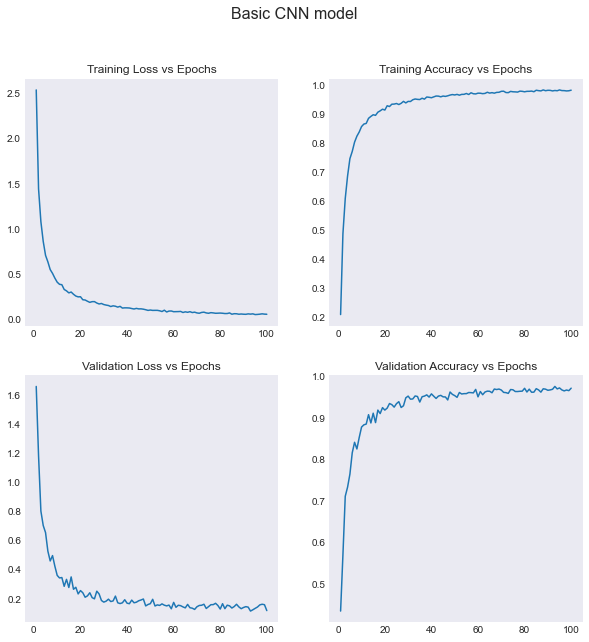

In [28]:
import seaborn as sns
plt.style.use('seaborn-dark')
fig, ax = plt.subplots(2, 2, figsize=(10, 10))
sns.lineplot(x=np.arange(1, 101), y=history.history.get('loss'), ax=ax[0, 0])
sns.lineplot(x=np.arange(1, 101), y=history.history.get('accuracy'), ax=ax[0, 1])
sns.lineplot(x=np.arange(1, 101), y=history.history.get('val_loss'), ax=ax[1, 0])
sns.lineplot(x=np.arange(1, 101), y=history.history.get('val_accuracy'), ax=ax[1, 1])
ax[0, 0].set_title('Training Loss vs Epochs')
ax[0, 1].set_title('Training Accuracy vs Epochs')
ax[1, 0].set_title('Validation Loss vs Epochs')
ax[1, 1].set_title('Validation Accuracy vs Epochs')
fig.suptitle('Basic CNN model', size=16)
plt.show()

In [30]:
model.save("arabic_character_recognition.h5")